<a href="https://colab.research.google.com/github/gowthamav007/sample-customer-analysis/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUSTOMER ANALYSIS

Problem Statement:

The goal of this project is to analyze customer behavior and classify them based on their likelihood to accept campaigns held by a company. Additionally, we aim to segment customers into different groups to gain insights into their behavior patterns.

Introduction : The dataset contains information about customers, including various attributes such as age, gender, income, past purchase history, and campaign acceptance. We'll explore correlations among these features and derive insights to understand customer behavior better.

Exploratory Data Analysis (EDA). We'll load the dataset, inspect its structure, and perform initial analysis to understand the data better.

I'll begin by importing the required libraries and loading the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv("/content/customer_train.csv")

We will start by checking the information of the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1680 non-null   int64         
 1   Year_Birth                1680 non-null   int64         
 2   Education                 1680 non-null   int64         
 3   Marital_Status            1680 non-null   int64         
 4   Income                    1680 non-null   float64       
 5   Kidhome                   1680 non-null   int64         
 6   Teenhome                  1680 non-null   int64         
 7   Dt_Customer               1680 non-null   datetime64[ns]
 8   Recency                   1680 non-null   int64         
 9   MntCoke                   1680 non-null   int64         
 10  MntFruits                 1680 non-null   int64         
 11  MntMeatProducts           1680 non-null   int64         
 12  MntFishProducts     

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Age,Total_Spend,Frequency,RFM_scores,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted,Campaign_Acceptance_Rate,High_Value_Customer
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,68,1617000,22,161686.0,18,4,22,1,0.166667,1
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,71,27000,4,2670.0,2,2,4,0,0.000000,0
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,60,776000,20,77614.0,10,10,20,0,0.000000,0
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,41,53000,6,5286.0,2,4,6,0,0.000000,0
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,44,422000,14,42134.0,8,6,14,0,0.000000,0


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0
1679,1679,1679,8230,1980,S1,Menikah,33228000.0,1,0,23-01-2014,...,7,0,0,0,0,0,0,3,11,0


In [ ]:
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object


Data Preprocessing: Remove unnecessary columns (e.g., 'Unnamed: 0.1', 'Unnamed: 0'), handle missing values in the 'Income' column, and convert categorical variables into a format suitable for modeling. Feature Engineering: Explore creating new features that could be relevant for predicting campaign acceptance and customer segmentation.

In [ ]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,17
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntCoke,0


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df['Income'].fillna(df['Income'].median(), inplace= True)
df.isnull().sum()

<ipython-input-11-12c0b5a63fdc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace= True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntCoke,0


In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

Creating a new features called 'Customer_years' to understand the Number of years since the customer joined.

In [ ]:
df['Customer_years']=2025-df['Dt_Customer'].dt.year
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Total_Spend,Frequency,RFM_scores,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted,Campaign_Acceptance_Rate,High_Value_Customer,Customer_years
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,1617000,22,161686.0,18,4,22,1,0.166667,1,13
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,27000,4,2670.0,2,2,4,0,0.000000,0,11
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,776000,20,77614.0,10,10,20,0,0.000000,0,12
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,53000,6,5286.0,2,4,6,0,0.000000,0,11
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,422000,14,42134.0,8,6,14,0,0.000000,0,11


Creating a new features called 'Age' to understand Current age of the customer (based on Year_Birth).

In [ ]:
df["Age"] = 2025-df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,0,0,3,11,0,44


Convert categorical variables like 'Education' and 'Marital Status' to nummerical variables using LabelEncoder.

In [ ]:
label_encoder = LabelEncoder()
df['Education']=label_encoder.fit_transform(df['Education'])
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,int64
Marital_Status,int64
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntCoke,int64


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,0,0,3,11,0,44


Creating a new feature for analysing Total amount spent on all product categories by a customer.

In [ ]:
df['Total_Spend'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                         'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spend
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,0,3,11,1,68,1617000
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,0,3,11,0,71,27000
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,0,3,11,0,60,776000
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,0,3,11,0,41,53000
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,0,3,11,0,44,422000


Creating a new feature for getting a combined score based on Recency, Frequency, and Monetary value.

In [ ]:
df['Frequency']=df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['RFM_scores'] = df['Recency']*-1+df['Frequency']*2+df['Total_Spend']*.1
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spend,Frequency,RFM_scores
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,3,11,1,68,1617000,22,161686.0
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,3,11,0,71,27000,4,2670.0
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,3,11,0,60,776000,20,77614.0
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,3,11,0,41,53000,6,5286.0
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,3,11,0,44,422000,14,42134.0


Creating a new feature for analysing online,offline and total purchases by customers.

In [ ]:
df['Online_purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases']].sum(axis=1)
df['Offline_purchases'] = df['NumStorePurchases']
df['Total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Z_CostContact,Z_Revenue,Response,Age,Total_Spend,Frequency,RFM_scores,Online_purchases,Offline_purchases,Total_purchases
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,3,11,1,68,1617000,22,161686.0,18,4,22
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,3,11,0,71,27000,4,2670.0,2,2,4
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,3,11,0,60,776000,20,77614.0,10,10,20
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,3,11,0,41,53000,6,5286.0,2,4,6
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,3,11,0,44,422000,14,42134.0,8,6,14


Creating new features for analysing campaign acceptance.

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Campaign_Accepted'] = df[campaign_cols].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Z_Revenue,Response,Age,Total_Spend,Frequency,RFM_scores,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,11,1,68,1617000,22,161686.0,18,4,22,1
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,11,0,71,27000,4,2670.0,2,2,4,0
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,11,0,60,776000,20,77614.0,10,10,20,0
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,11,0,41,53000,6,5286.0,2,4,6,0
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,11,0,44,422000,14,42134.0,8,6,14,0


In [ ]:
df['Campaign_Acceptance_Rate'] = df['Total_Campaign_Accepted'] / len(campaign_cols)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Response,Age,Total_Spend,Frequency,RFM_scores,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted,Campaign_Acceptance_Rate
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,1,68,1617000,22,161686.0,18,4,22,1,0.166667
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,71,27000,4,2670.0,2,2,4,0,0.000000
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,60,776000,20,77614.0,10,10,20,0,0.000000
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,41,53000,6,5286.0,2,4,6,0,0.000000
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,44,422000,14,42134.0,8,6,14,0,0.000000


Creating new features for analysing high value customers(Spending above 75th percentile)

In [ ]:
high_value = df['Total_Spend'].quantile(0.75)
df['High_Value_Customer'] = (df['Total_Spend'] >= high_value).astype(int)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Age,Total_Spend,Frequency,RFM_scores,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted,Campaign_Acceptance_Rate,High_Value_Customer
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,68,1617000,22,161686.0,18,4,22,1,0.166667,1
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,71,27000,4,2670.0,2,2,4,0,0.000000,0
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,60,776000,20,77614.0,10,10,20,0,0.000000,0
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,41,53000,6,5286.0,2,4,6,0,0.000000,0
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,44,422000,14,42134.0,8,6,14,0,0.000000,0


Purpose of these features:
1. Better Segmentation:
Total_Spend and RFM_Score help classify high-value customers.
Online_Spend vs. Offline_Spend identifies shopping behavior.
2.  Improved Marketing Strategy
Campaign_Acceptance_Rate helps target customers who are more likely to engage.
Customer_years helps in loyalty program design.
3. Predictive Power for ML Models
Total_Purchases, Age, and High_Value_Customer can improve classification accuracy.

Using visualizations to analyse the relationship between the various features.

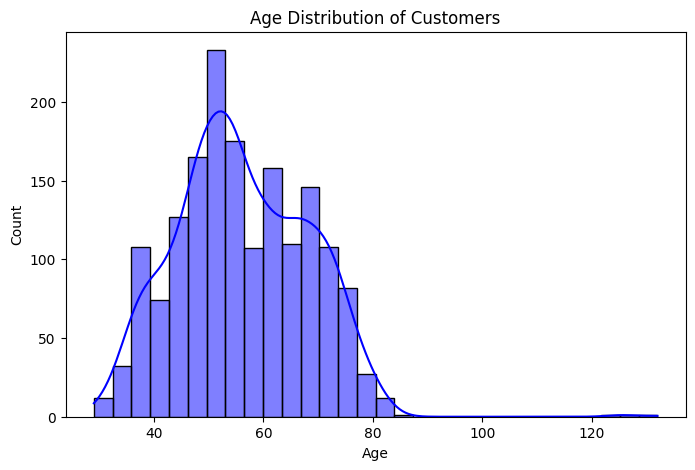

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=30, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

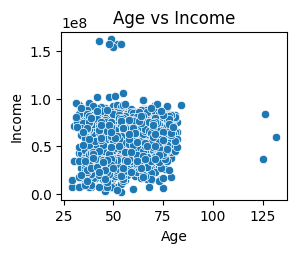

In [ ]:
plt.subplot(2,2,3)
sns.scatterplot(df, x='Age', y='Income')
plt.title('Age vs Income')
plt.show()

Text(0.5, 1.0, 'Income Distribution')

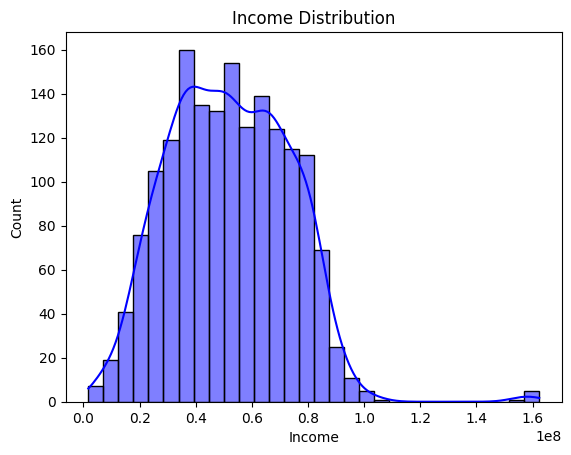

In [ ]:
sns.histplot(df['Income'],bins=30, kde=True, color='blue')
plt.title('Income Distribution')

The income distribution visualization provides several insights into the financial status of the customers:

Skewed Distribution: The income distribution is right-skewed, indicating that a larger number of customers have incomes on the lower end of the scale, while fewer customers have higher incomes. Income Range: There's a wide range of incomes among the customers, from the lower end to some high-income individuals. This suggests a diverse customer base in terms of financial standing. Potential High Earners: The presence of customers with higher incomes (as seen from the tail of the distribution) could represent a segment with potentially higher spending power. Understanding the income distribution is crucial for tailoring marketing strategies, product offerings, and customer service to meet the needs of different income groups effectively.

Text(0.5, 1.0, 'Total Amount Spent Distribution')

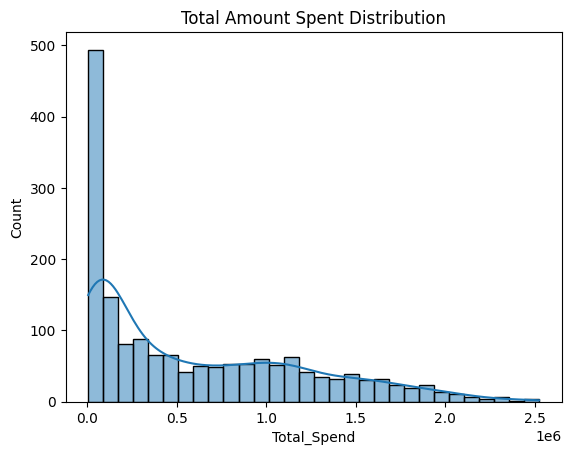

In [ ]:

sns.histplot(df['Total_Spend'], bins=30, kde=True)
plt.title('Total Amount Spent Distribution')

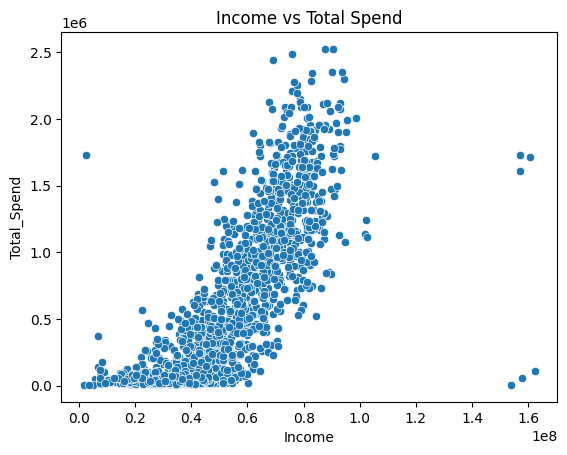

In [ ]:
sns.scatterplot(df, x='Income', y='Total_Spend')
plt.title('Income vs Total Spend')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1680 non-null   int64         
 1   Year_Birth                1680 non-null   int64         
 2   Education                 1680 non-null   int64         
 3   Marital_Status            1680 non-null   int64         
 4   Income                    1680 non-null   float64       
 5   Kidhome                   1680 non-null   int64         
 6   Teenhome                  1680 non-null   int64         
 7   Dt_Customer               1680 non-null   datetime64[ns]
 8   Recency                   1680 non-null   int64         
 9   MntCoke                   1680 non-null   int64         
 10  MntFruits                 1680 non-null   int64         
 11  MntMeatProducts           1680 non-null   int64         
 12  MntFishProducts     

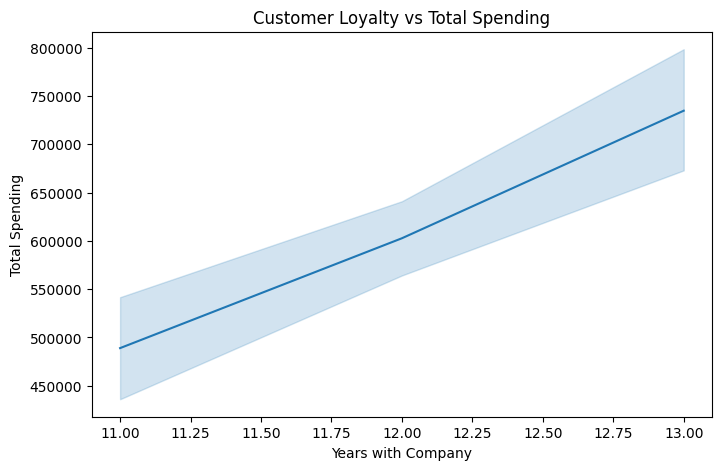

In [57]:
plt.figure(figsize=(8, 5))
sns.lineplot(df, x='Customer_years', y='Total_Spend')
plt.title("Customer Loyalty vs Total Spending")
plt.xlabel("Years with Company")
plt.ylabel("Total Spending")
plt.show()

The above graph shows that as customer loyality increases, total spending also increases linearly.


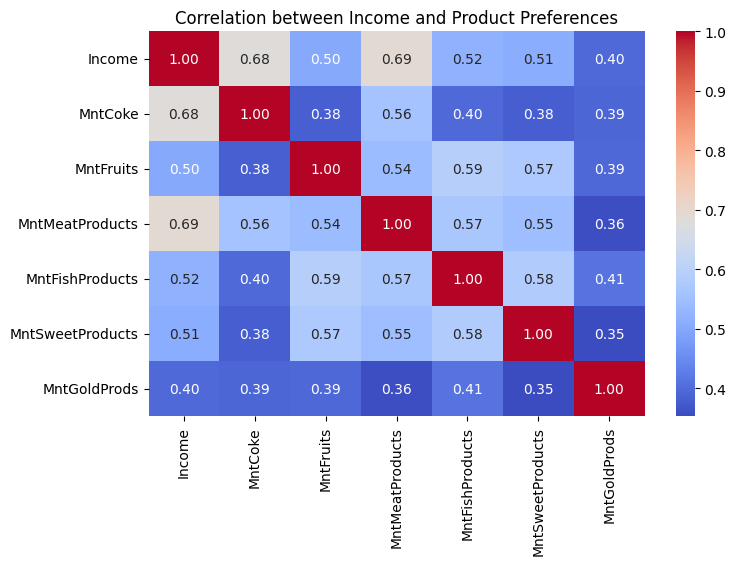

In [ ]:
# Correlation between income levels and specific product preferences
correlation_matrix = df[['Income', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Income and Product Preferences")
plt.show()


Income and Meat Products: There's a noticeable positive correlation between income and spending on meat products. This suggests that as income increases, customers tend to spend more on meat products. Income and Gold Products: Similarly, there's a positive correlation between income and spending on gold products, indicating that higher-income customers are more likely to purchase gold products. Income and Fruits, Fish, and Sweets: These categories show weaker correlations with income compared to meat and gold products. This implies that while there's still a positive relationship, the tendency to spend more on fruits, fish, and sweets as income increases is not as strong as it is for meat and gold products. Income and Coke: The correlation between income and spending on Coke is relatively low, suggesting that income level is not a strong predictor of spending in this category. These trends indicate that income level is a significant factor in customer preferences for certain product categories, particularly meat and gold products. Marketing strategies could be tailored to target higher-income groups with these product categories, while a broader approach may be necessary for categories like fruits, fish, sweets, and Coke, where the correlation with income is weake

The matrix shows correlations between different product categories and income. Here's a breakdown of the information in the image:

Rows and Columns: The rows represent different product categories (MntCoke, MntFruits, MntMeatProducts, etc.) and "Income". The columns represent the same product categories and "Income". The diagonal cells (where a row and column intersect for the same category) all have a value of 1.

Color Coding: The color coding indicates the strength and direction of the correlation. Generally, a darker blue color indicates a stronger positive correlation, while a darker red color indicates a stronger negative correlation. White or lighter shades indicate a weaker correlation.

Positive Correlation: A positive correlation between a product category and income suggests that people with higher income tend to spend more on that category. For example, in the image, "MntGoldProds" (potentially gold products) has a positive correlation with income, which might mean people with higher income spend more on gold products.

Negative Correlation: A negative correlation suggests that people with higher income tend to spend less on that category. For instance, the image shows a negative correlation between "Income" and "MntCoke" (potentially bottled coke), which could indicate that people with higher income buy less bottled coke.

Correlation Values: The values within the matrix represent the correlation coefficient, a statistical measure between -1 and 1. A value closer to 1 indicates a stronger positive correlation, while a value closer to -1 indicates a stronger negative correlation. A value around 0 suggests little to no correlation.

It's important to note that correlation doesn't necessarily imply causation. Just because there's a correlation between income and a particular product category doesn't necessarily mean that a higher income directly causes people to spend more on that category. There could be other factors at play.

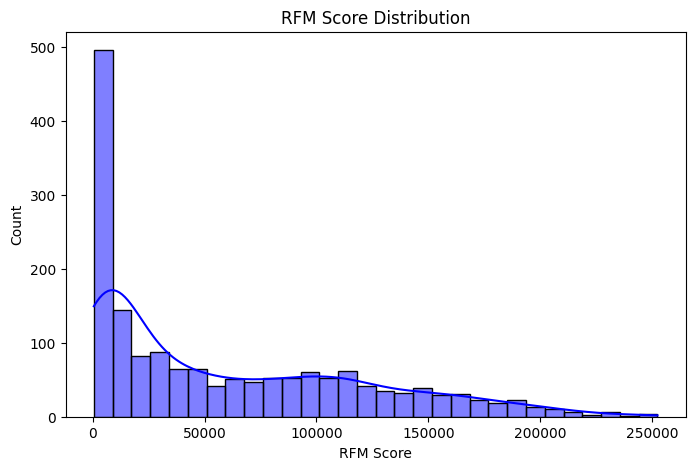

In [ ]:
# Visualizing RFM Segments
plt.figure(figsize=(8, 5))
sns.histplot(df['RFM_scores'], bins=30, kde=True, color='blue')
plt.title("RFM Score Distribution")
plt.xlabel("RFM Score")
plt.ylabel("Count")
plt.show()

<ipython-input-54-99373f126f5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Total_Campaign_Accepted'], palette="magma")


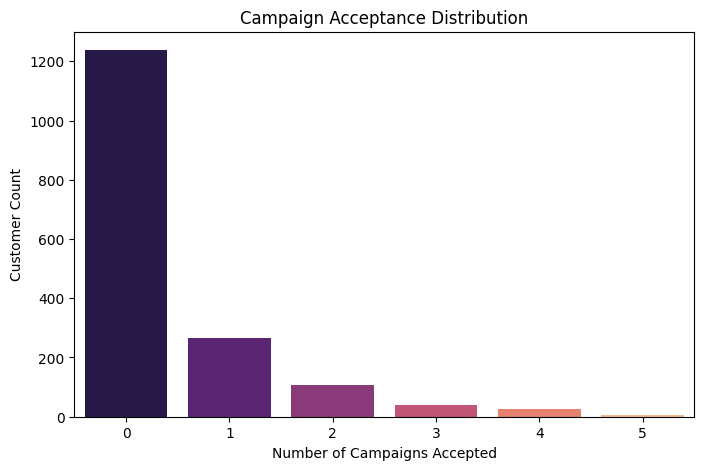

In [ ]:
# Count of customers accepting campaigns
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Total_Campaign_Accepted'], palette="magma")
plt.title("Campaign Acceptance Distribution")
plt.xlabel("Number of Campaigns Accepted")
plt.ylabel("Customer Count")
plt.show()

In [ ]:
features = ['Total_Spend', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Income']
x = df[features]
# Standardize features
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
x

,Total_Spend,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Income
0,1617000,8,10,4,58138000.0
1,27000,1,1,2,46344000.0
2,776000,8,2,10,71613000.0
3,53000,2,0,4,26646000.0
4,422000,5,3,6,58293000.0
...,...,...,...,...,...
1675,82000,1,1,4,20193000.0
1676,244000,5,1,4,27573000.0
1677,36000,1,0,3,15862000.0
1678,404000,5,1,8,49544000.0


In [60]:
#k means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Frequency,RFM_scores,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted,Campaign_Acceptance_Rate,High_Value_Customer,Customer_years,Cluster
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,22,161686.0,18,4,22,1,0.166667,1,13,4
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,4,2670.0,2,2,4,0,0.000000,0,11,2
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,20,77614.0,10,10,20,0,0.000000,0,12,3
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,6,5286.0,2,4,6,0,0.000000,0,11,2
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,14,42134.0,8,6,14,0,0.000000,0,11,0


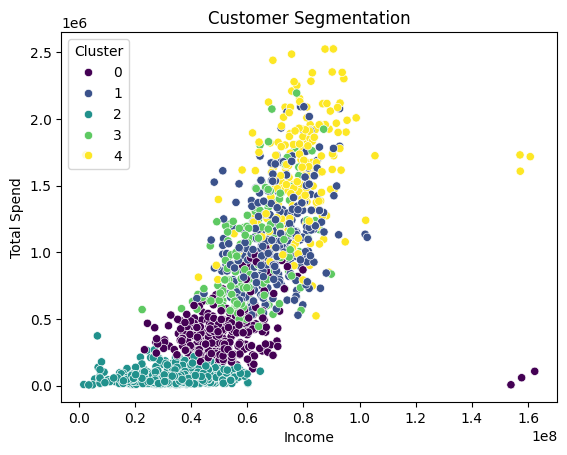

In [61]:
#visualize clusters
sns.scatterplot(df, x='Income', y='Total_Spend', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

Exclude and non-relevant features

In [66]:
#Define input and target variable
x=df.drop(columns=['ID', 'Response', 'Dt_Customer', 'Cluster'])
y=df['Response']
#Splitting the dataset into train and test set.
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

This part of the code is where the machine learning model is trained to predict customer responses to marketing campaigns

In [68]:
#train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Evaluating the performance of the trained machine learning model. It involves predicting outcomes on unseen data and assessing the quality of those predictions using various metrics.


In [69]:
y_pred = model.predict(x_test)
# Evaluate model
y_pred
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9761904761904762

Confusion Matrix:
 [[289   3]
 [  5  39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       292
           1       0.93      0.89      0.91        44

    accuracy                           0.98       336
   macro avg       0.96      0.94      0.95       336
weighted avg       0.98      0.98      0.98       336



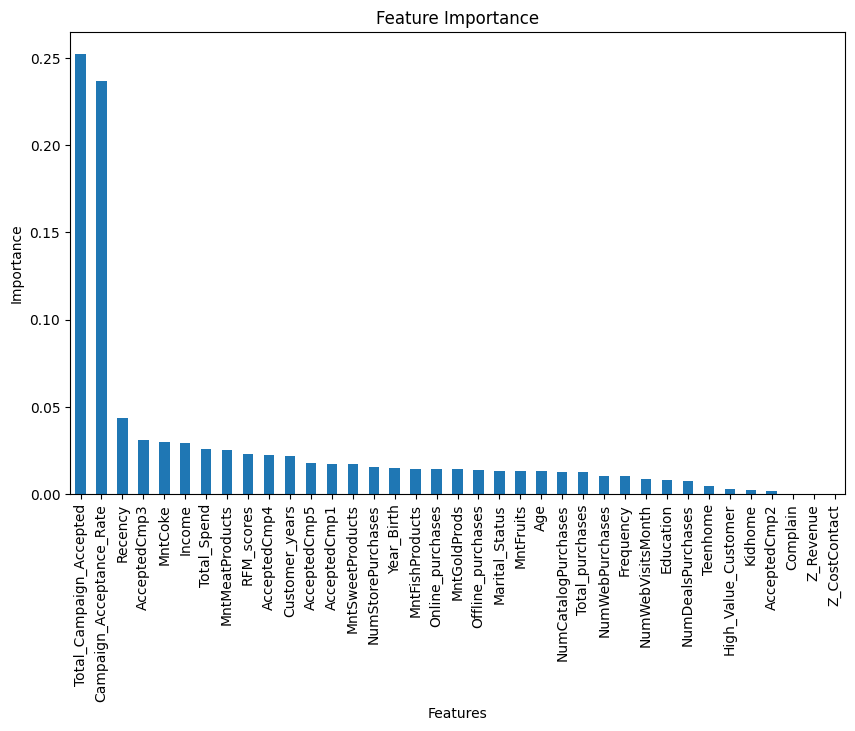

In [72]:
#feature importance
importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [85]:
!pip install scikit-learn

In [90]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [91]:
# Predict on the test set
y_pred_logreg = logreg_model.predict(x_test)

# Evaluate Logistic Regression model
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Model Accuracy: 0.8571428571428571

Logistic Regression Confusion Matrix:
 [[287   5]
 [ 43   1]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       292
           1       0.17      0.02      0.04        44

    accuracy                           0.86       336
   macro avg       0.52      0.50      0.48       336
weighted avg       0.78      0.86      0.81       336

